In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#1. Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#2. Data Loading

In [ ]:
#Load the dataset
path="/content/drive/MyDrive/Lab3/Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.xlsx"
df = pd.read_excel(path)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
# Split the dataset into features (X) and target (y)
# Normalize the input values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.i = scaler.fit_transform(df.iloc[:, :-1])

# Print the normalized data
print(df)

          Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     1.479830   2.004354           2.348547          -0.212943      2.018337   
1     1.147870   1.125853           0.988390           0.945568      0.410018   
2     1.135169   1.317214           1.451908           0.253887      1.212956   
3     0.293436   0.115300           0.261439           0.198051      0.239751   
4     1.166345   1.487053           1.316442           0.523419      0.952221   
...        ...        ...                ...                ...           ...   
3805 -0.708215  -1.078353          -1.048323          -0.097251     -1.085282   
3806 -0.601988  -0.922926          -1.207208           0.549622     -1.970731   
3807 -0.133204  -0.329851          -0.298245           0.085220     -0.275099   
3808 -1.608257  -1.740320          -1.580971          -1.414414     -0.598821   
3809 -0.712256  -1.391566          -1.587546           0.794972     -2.939160   

      Convex_Area    Extent

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train)

3048

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
model.score(X_test, y_test)

0.9212598425196851

In [ ]:
y_predicted = model.predict(X_test)
len(X_test)

762

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[306,  34],
       [ 26, 396]])

Text(95.72222222222221, 0.5, 'Actual')

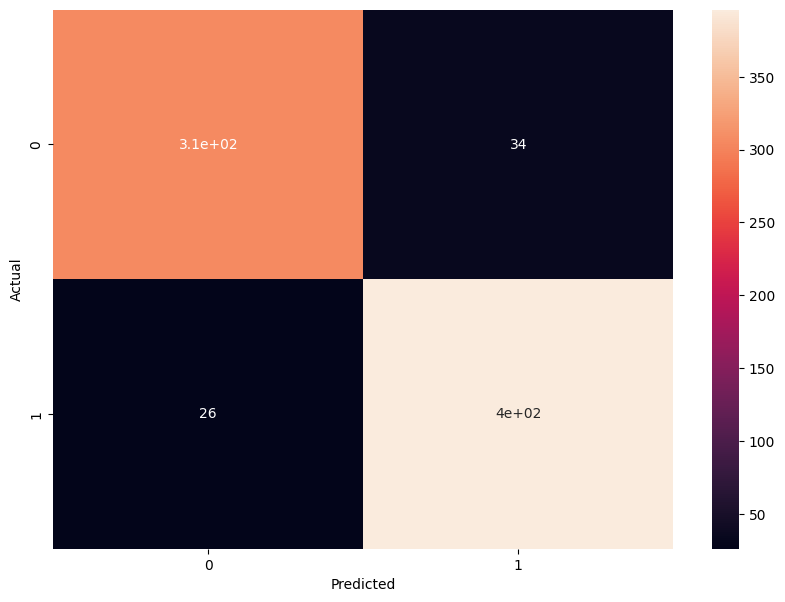

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Performed one-hot encoding on categorical features
#To change categorical variables into numerical form
encoder = OneHotEncoder()
target_values = encoder.fit_transform(df.iloc[:, -1:].values).toarray()
print(target_values)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
#Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split the dataset into training/validation/test sets
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, :-1].values, target_values, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#Apply feature-scaling,
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_test)

[[-0.16283705  0.10530896 -0.12666091 ... -0.14627473 -0.03874596
  -0.92163435]
 [-0.18272383 -0.5339085  -0.57739906 ... -0.94049008 -0.23429835
  -0.27316047]
 [ 0.08574774 -0.19143766 -0.46370049 ... -1.18319044  0.08155012
  -0.11371835]
 ...
 [-0.86940276 -0.84847949 -0.77696546 ... -0.16482595 -0.88765998
  -0.0280783 ]
 [ 0.73791726  0.68006834  0.86175014 ...  0.68596142  0.69101223
   1.51377383]
 [ 0.93620018  0.98206491  0.84654648 ...  0.38785626  0.91963179
  -1.10174944]]


In [ ]:
#Create a random forest classifier, train the classifier and predict the labels for the test set
classiffier = RandomForestClassifier(n_estimators=100, random_state=42)
classiffier.fit(X_train, y_train)
y_pred = classiffier.predict(X_test)

In [ ]:
#Calculate and print evaluation metrics
# Confusion Matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(confusion_mat)

# Accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
print("Precision:", precision)

# Sensitivity (Recall)
sensitivity = recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
print("Sensitivity:", sensitivity)

# F1 Score
f1 = f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')
print("F1 Score:", f1)


Confusion Matrix:
[[314  36]
 [ 20 392]]
Accuracy: 0.926509186351706
Precision: 0.9270179928611391
Sensitivity: 0.926509186351706
F1 Score: 0.9263495571825451


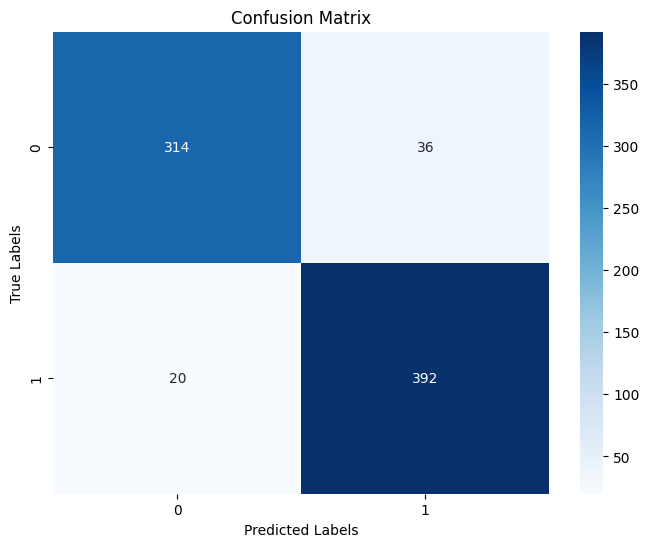

In [ ]:
#Compute confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

#Get class labels from the confusion matrix
labels = np.unique(np.concatenate((y_test.argmax(axis=1), y_pred.argmax(axis=1))))

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
